## 任务七：最短路径 -- 弗洛伊德算法（难度：★★★★）

实现基本功能：（包括但不限于，可以根据自己能力继续扩展）只有一个图类

　（1）初始化函数（采用邻接矩阵即可）

　（2）创建有向网（和有向图不同的是二阶矩阵中存储的是权值）

　（3）弗洛伊德算法实现最短路径函数
 
　（4）遍历结果，按固定格式打印出来（如果有更好地展示方式，小伙伴可以随意发挥！）

测试案例：

　**（1）案例1：**

![Image Name](https://cdn.kesci.com/upload/image/qwzjcq7gau.png?imageView2/0/w/640/h/480)

　**输出结果：**

　　1）打印从源点Vi到终点Vj的当前最短路径上每个顶点的直接前驱顶点序号

　　　　　　　[[-1, -1, 0, 4, 0, 3],
　　　　　　　[-1, -1, 1, 2, -1, 3],
　　　　　　　[-1, -1, -1, 2, -1, 3],
　　　　　　　[-1, -1, -1, -1, -1, 3],
　　　　　　　[-1, -1, -1, 4, -1, 3],
　　　　　　　[-1, -1, -1, -1, -1, -1]]

　【简单解释下：二维数组中总共有6个一维数组，每个一维数组表示的就是每一个顶点，而一维数组里的每一个元素索引也是表示每一个顶点；这里以二维数组的第一个一维数组为例，也就是[-1, -1, 0, 4, 0, 3] ，由于这是第一个一维数组，所以源点就代表V0，这个数组里的数是什么意思呢？这个表示前驱顶点的索引数，代码中如果两个顶点之间没有前驱顶点，默认为-1，从这个数组前两个数可以看出：V0到V0和V0到V1都是没有前驱顶点的；数组第3个数为0，表示顶点V2的前驱就是索引为0的顶点，也就是V0，故V0到V2的最短路径即为V0-V2这一线段；数组第4个数是4, 然后再找索引为4的值也就是数组第5个为0，翻译过来就是V0到V3的最短路径为：V0-V4-V3；下一个，数组的第5个数为0，表示V4的前驱顶点为V0，也就是V0-V4即是最短路径；数组第6个值为3，表示V5的前驱是索引为3的顶点，也就是V3，V3的前驱是V4，V4的前驱是V0，所以V0到V5的最短路径即为：V0-V4-V3-V5；第一个一维数组表示的是以V0为源点的，其他的同理】

　　2）打印源点Vi到终点Vj的最短路径是多少？

　　　　　　　[[0, inf, 10, 50, 30, 60],
　　　　　　　[inf, 0, 5, 55, inf, 65],
　　　　　　　[inf, inf, 0, 50, inf, 60],
　　　　　　　[inf, inf, inf, 0, inf, 10],
　　　　　　　[inf, inf, inf, 20, 0, 30],
　　　　　　　[inf, inf, inf, inf, inf, 0]]

　【注：这里最短路径的解释跟路径差不多道理，只不过上面那个二维数组中每个值表示的是顶点的前驱索引，而这里只不过把顶点到顶点的最短路径显示出来了，比如第一个一维数组，即[0, inf, 10, 50, 30, 60]，意思为V0到V0的最短路径为0；V0到V1的最短距离为inf -- 无穷大，说明没有直达的线路；V0到V2的最短路径为V0-V2，距离为10；V0到V3的最短路径为V0-V4-V3，距离为50；V0到V4的最短路径为V0-V4，距离为30；V0到V5的最短路径为V0-V4-V3-V5，距离为60】

　**（2）案例2：**
 
![Image Name](https://cdn.kesci.com/upload/image/qwzjfrn11a.png?imageView2/0/w/640/h/640)

　** 输出结果：**
 
　　1）打印从源点Vi到终点Vj的当前最短路径上每个顶点的直接前驱顶点序号

　　　　　　　[[-1, 0, 3, 1, 2, 4],
　　　　　　　[-1, -1, 3, 1, 2, 4],
　　　　　　　[-1, -1, -1, -1, 2, 4],
　　　　　　　[-1, -1, 3, -1, 2, 4],
　　　　　　　[-1, -1, -1, -1, -1, 4],
　　　　　　　[-1, -1, -1, -1, -1, -1]]

　　2）打印源点Vi到终点Vj的最短路径是多少？

　　　　　　　[[0, 1, 8, 4, 13, 17], 
　　　　　　　[inf, 0, 7, 3, 12, 16], 
　　　　　　　[inf, inf, 0, inf, 5, 9], 
　　　　　　　[inf, inf, 4, 0, 9, 13], 
　　　　　　　[inf, inf, inf, inf, 0, 4], 
　　　　　　　[inf, inf, inf, inf, inf, 0]]
			 
　【提示：如果小伙伴没有思路的话，可以参考严蔚敏老师的著作《数据结构》一书，尝试理解上面的C语言代码，在根据思路改成Python代码，仅限新手小白；如果是大佬，可以忽略提示哈】

### 1. 定义一个图类，包含实现弗洛伊德算法的函数

In [1]:
## 定义图类
class Graph():
    # 初始化函数
    def __init__(self, vexs):
        self.vexs = vexs # 存储图中顶点的数据
        n = len(vexs)
        inf = float('inf') # 表示无穷大
        self.matrix = [[inf]*n for i in range(n)] # 二维数组，记录顶点之间的关系
        for i in range(n):
            self.matrix[i][i] = 0 # 设置Vi到Vi的权值为0，其余默认为Inf无穷大
    
    # 构造有向网，和有向图不同的是二阶矩阵中存储的是权值。
    def CreateUDG(self, relation):
        for rela in relation:
            m = rela[0]
            n = rela[1]
            self.matrix[m][n] = rela[2]
        return self.matrix
    
    # 弗洛伊德算法
    def Floyd(self):
        inf = float('inf')
        n = len(self.vexs)
        prior = [[-1]*n for i in range(len(self.vexs))] # 记录从源点V0到终点Vi的当前最短路径上Vi的直接前驱顶点序号，默认为-1
        minest = [[inf]*n for i in range(len(self.vexs))] # 记录从源点V0到终点Vi的当前最短路径长度，默认为在∞
        
        # 初始化
        for i in range(n):
            for j in range(n):
                minest[i][j] = self.matrix[i][j]
                if minest[i][j] < inf and i != j: 
                    prior[i][j] = i # 如果i和j之间有弧，则将j的前驱置为i
                else: 
                    prior[i][j] = -1 # 如果i和j之间无弧，则将j的前驱设为-1
         
        for k in range(n):
            for i in range(n):
                for j in range(n):
                    if minest[i][k] + minest[k][j] < minest[i][j]:
                        minest[i][j] = minest[i][k] + minest[k][j]
                        prior[i][j] = prior[k][j]
        return prior, minest

### 2. 测试案例1

![Image Name](https://cdn.kesci.com/upload/image/qwzjcq7gau.png?imageView2/0/w/640/h/480)
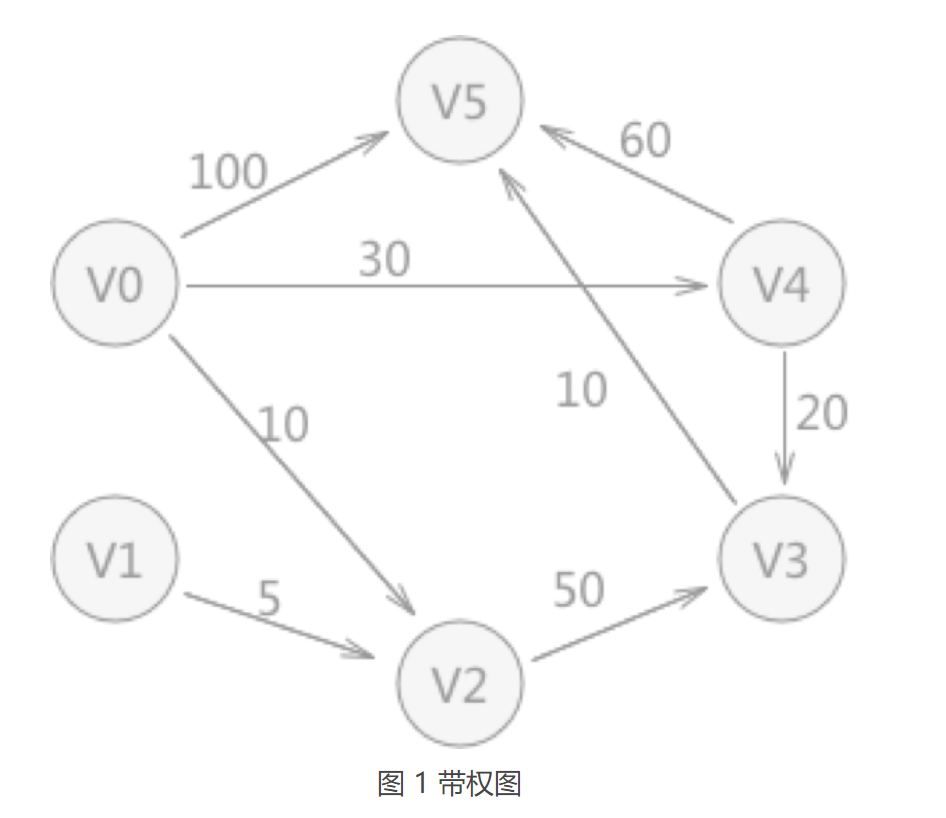

### 3. 创建一个图类，并添加相应的顶点和弧边

In [2]:
vexnum = 6 # 顶点个数
V0, V1, V2, V3, V4, V5 = range(vexnum)
vexs = ['V0', 'V1', 'V2', 'V3', 'V4', 'V5'] # 顶点数据
relation_UDG = [[V0, V2, 10], [V0, V4, 30], [V0, V5, 100], [V1, V2, 5], [V2, V3, 50], [V3, V5, 10], [V4, V3, 20], [V4, V5, 60]] # 存储顶点之间关系
graph_UDG = Graph(vexs)
# 有向网，返回邻接矩阵
matrix_UDG = graph_UDG.CreateUDG(relation_UDG)
for UDG in matrix_UDG:
    print(UDG)

[0, inf, 10, inf, 30, 100]
[inf, 0, 5, inf, inf, inf]
[inf, inf, 0, 50, inf, inf]
[inf, inf, inf, 0, inf, 10]
[inf, inf, inf, 20, 0, 60]
[inf, inf, inf, inf, inf, 0]


### 4. 调用弗洛伊德函数，输出prior和minest

- prior：记录从源点V0到终点Vi的当前最短路径上Vi的直接前驱顶点序号，默认为-1
- minest：记录从源点V0到终点Vi的当前最短路径长度，默认为在∞

In [3]:
prior,minest = graph_UDG.Floyd()
print(prior)
print(minest)

[[-1, -1, 0, 4, 0, 3], [-1, -1, 1, 2, -1, 3], [-1, -1, -1, 2, -1, 3], [-1, -1, -1, -1, -1, 3], [-1, -1, -1, 4, -1, 3], [-1, -1, -1, -1, -1, -1]]
[[0, inf, 10, 50, 30, 60], [inf, 0, 5, 55, inf, 65], [inf, inf, 0, 50, inf, 60], [inf, inf, inf, 0, inf, 10], [inf, inf, inf, 20, 0, 30], [inf, inf, inf, inf, inf, 0]]


### 5. 测试案例2

![Image Name](https://cdn.kesci.com/upload/image/qwzjfrn11a.png?imageView2/0/w/640/h/640)
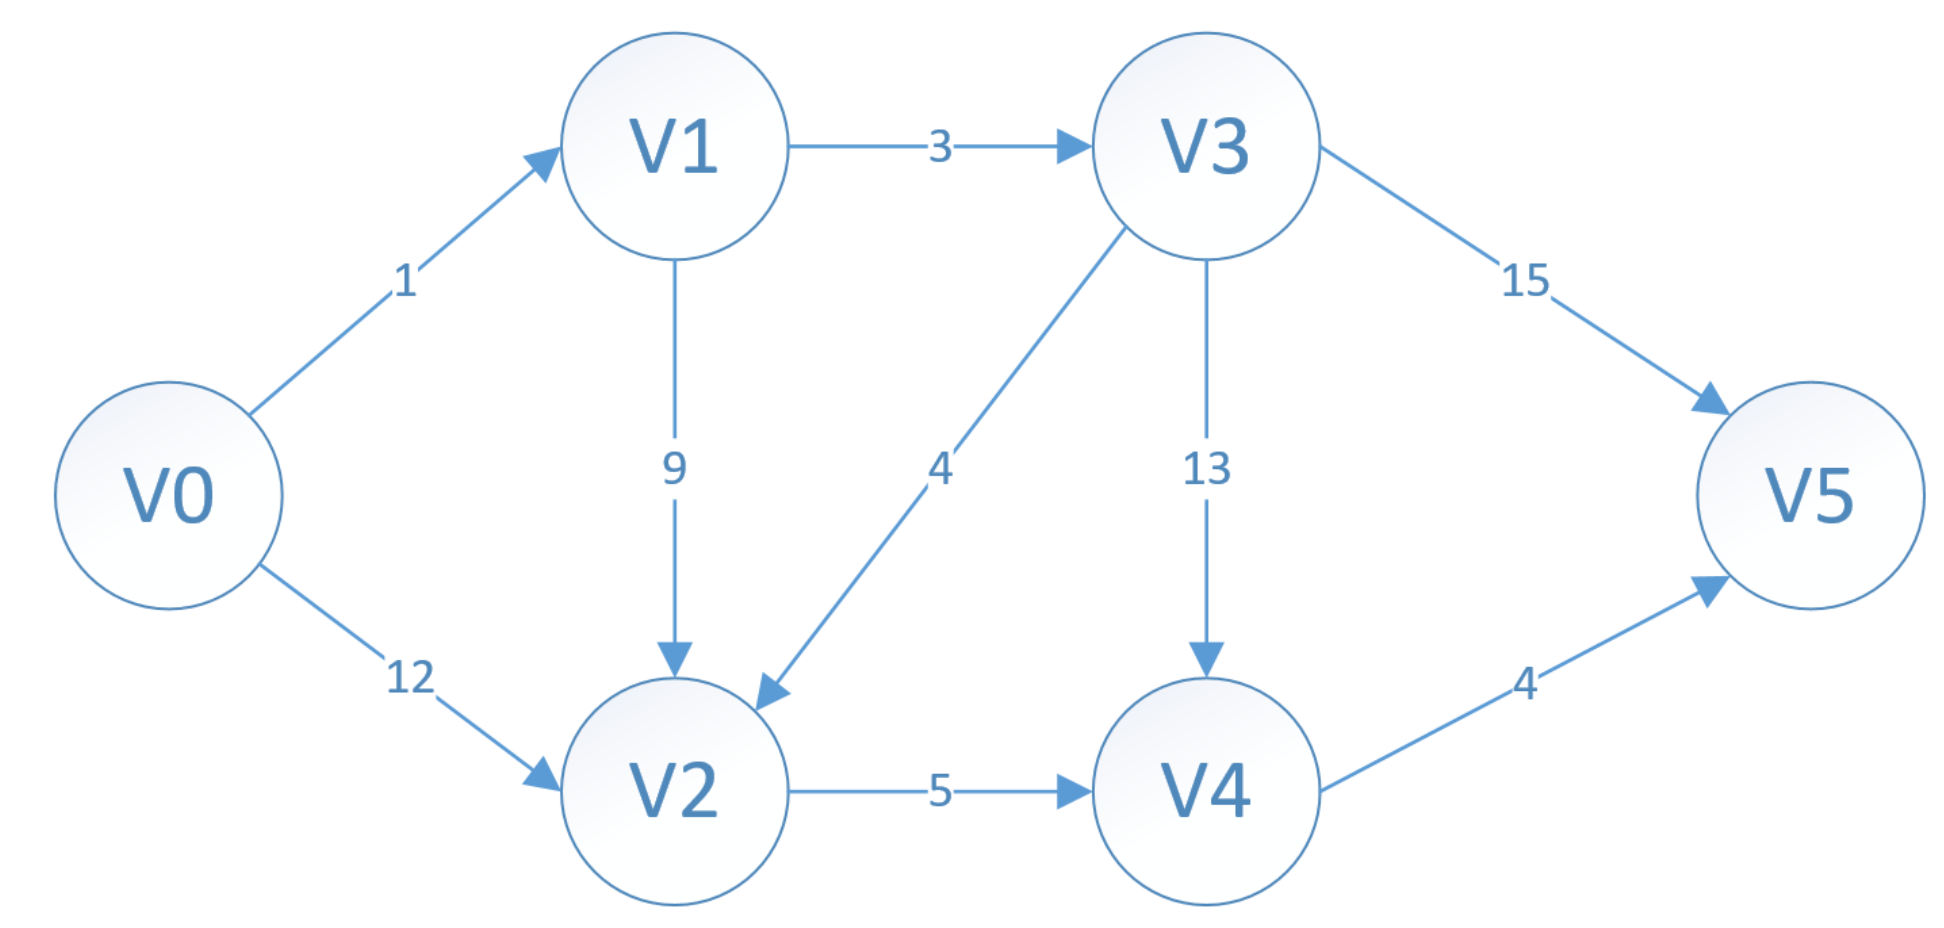

### 6. 创建一个图类，并添加相应的顶点和弧边

In [4]:
vexnum = 6 # 顶点个数
V0, V1, V2, V3, V4, V5 = range(vexnum)
vexs = ['V0', 'V1', 'V2', 'V3', 'V4', 'V5'] # 顶点数据
relation_UDG = [[V0, V1, 1], [V0, V2, 12], [V1, V2, 9], [V1, V3, 3], [V2, V4, 5], [V3, V2, 4], [V3, V4, 13], [V3, V5, 15], [V4, V5, 4]] # 存储顶点之间关系
graph_UDG = Graph(vexs)
# 有向网，返回邻接矩阵
matrix_UDG = graph_UDG.CreateUDG(relation_UDG)
for UDG in matrix_UDG:
    print(UDG)

[0, 1, 12, inf, inf, inf]
[inf, 0, 9, 3, inf, inf]
[inf, inf, 0, inf, 5, inf]
[inf, inf, 4, 0, 13, 15]
[inf, inf, inf, inf, 0, 4]
[inf, inf, inf, inf, inf, 0]


### 7. 调用弗洛伊德函数，输出prior和minest

In [5]:
prior,minest = graph_UDG.Floyd()
print(prior)
print(minest)

[[-1, 0, 3, 1, 2, 4], [-1, -1, 3, 1, 2, 4], [-1, -1, -1, -1, 2, 4], [-1, -1, 3, -1, 2, 4], [-1, -1, -1, -1, -1, 4], [-1, -1, -1, -1, -1, -1]]
[[0, 1, 8, 4, 13, 17], [inf, 0, 7, 3, 12, 16], [inf, inf, 0, inf, 5, 9], [inf, inf, 4, 0, 9, 13], [inf, inf, inf, inf, 0, 4], [inf, inf, inf, inf, inf, 0]]
